In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습](Next!!!!)
* 기상 데이터 분석
* 데이터 수집 : !wget "url"
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [3]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -o  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0   190k      0 --:--:-- --:--:-- --:--:--  190k


In [4]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0)
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 2010-08-01 to 2020-07-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균 기온   3653 non-null   float64
 1   최대 풍속   3649 non-null   float64
 2   평균 풍속   3647 non-null   float64
dtypes: float64(3)
memory usage: 114.2+ KB


In [6]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )

평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN


In [7]:
#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = round(weather['평균 풍속'].mean(), 2)
print(mean_wind )
weather.fillna(mean_wind, inplace=True)
weather.loc[["2012-02-11","2012-02-12","2012-02-13","2015-03-22","2015-04-01","2019-04-18"]]


3.94


,평균 기온,최대 풍속,평균 풍속
일시,,,
2012-02-11,-0.7,3.94,3.94
2012-02-12,0.4,3.94,3.94
2012-02-13,4.0,3.94,3.94
2015-03-22,10.1,11.60,3.94
2015-04-01,7.3,12.10,3.94
2019-04-18,15.7,11.70,3.94


In [8]:
#3) 결측 값을 최대 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
max_wind = weather['최대 풍속'].mean()
max_wind =round(mean_wind ,2)
print(max_wind )
print()
weather['최대 풍속'].fillna(max_wind, inplace=True)
weather.loc[["2012-02-11","2012-02-12","2012-02-13"]]

3.94



C:\Users\t0108\AppData\Local\Temp\ipykernel_223492\332974230.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['최대 풍속'].fillna(max_wind, inplace=True)


,평균 기온,최대 풍속,평균 풍속
일시,,,
2012-02-11,-0.7,3.94,3.94
2012-02-12,0.4,3.94,3.94
2012-02-13,4.0,3.94,3.94


In [9]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기


In [10]:
# 내 데이터프레임이 datetimeIndex 색인을 포함할 경우 연도 컬럼 추가
# weather = pd.read_csv("/content/sample_data/weather.csv",index_col = 0, parse_dates=True )
#weather.info()
# weather.head()
# weather['year'] = weather.index.year
# weather.head()

In [11]:
# 3.1 데이터프레임 평탄화
weather.reset_index(inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균 기온   3653 non-null   float64
 2   최대 풍속   3653 non-null   float64
 3   평균 풍속   3653 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [12]:
weather.reset_index(inplace=True)
weather.head()

,index,일시,평균 기온,최대 풍속,평균 풍속
0,0,2010-08-01,28.7,8.3,3.4
1,1,2010-08-02,25.2,8.7,3.8
2,2,2010-08-03,22.1,6.3,2.9
3,3,2010-08-04,25.3,6.6,4.2
4,4,2010-08-05,27.2,9.1,5.6


In [13]:
weather.drop(columns=["index"])

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [14]:
weather.drop(columns="index", inplace=True)

In [15]:
weather

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


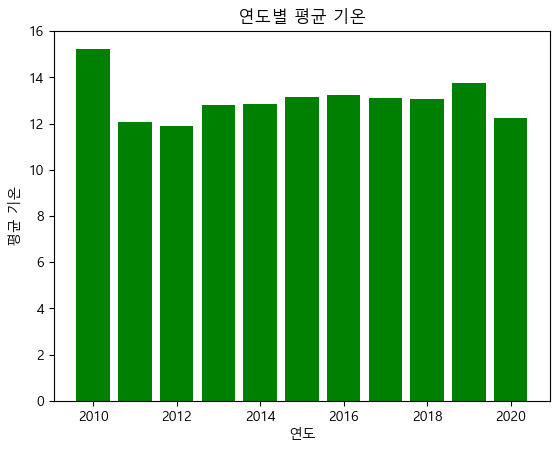

In [16]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year
weather.head()

# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()
yearly_temp # y축

# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021) # x축
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


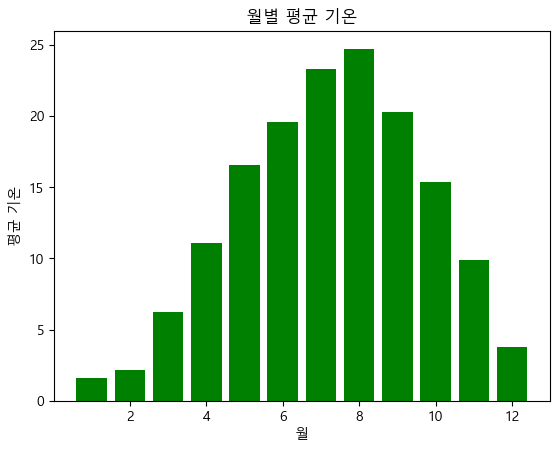

In [17]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


Text(0, 0.5, '평균 풍속')

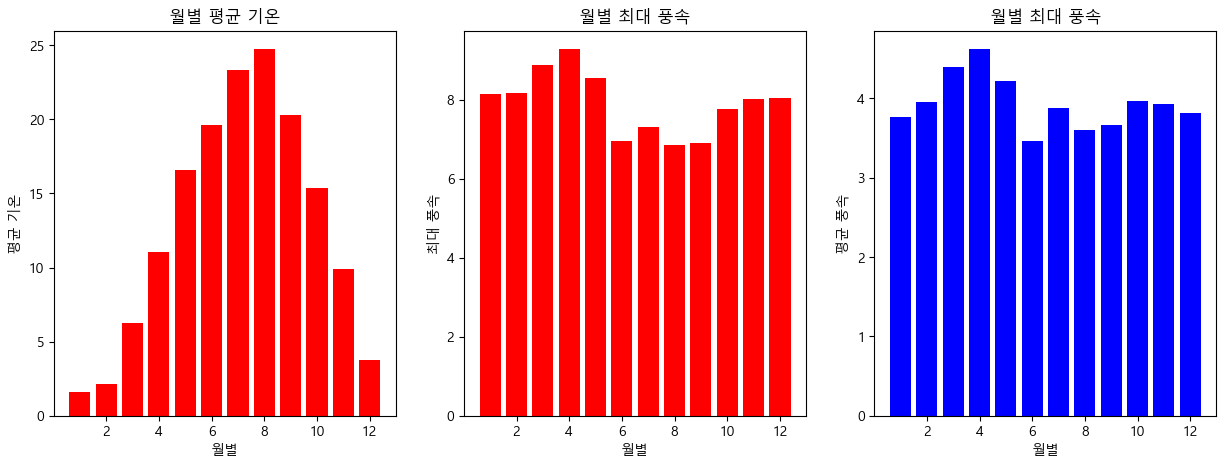

In [18]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

Text(0, 0.5, '평균 풍속')

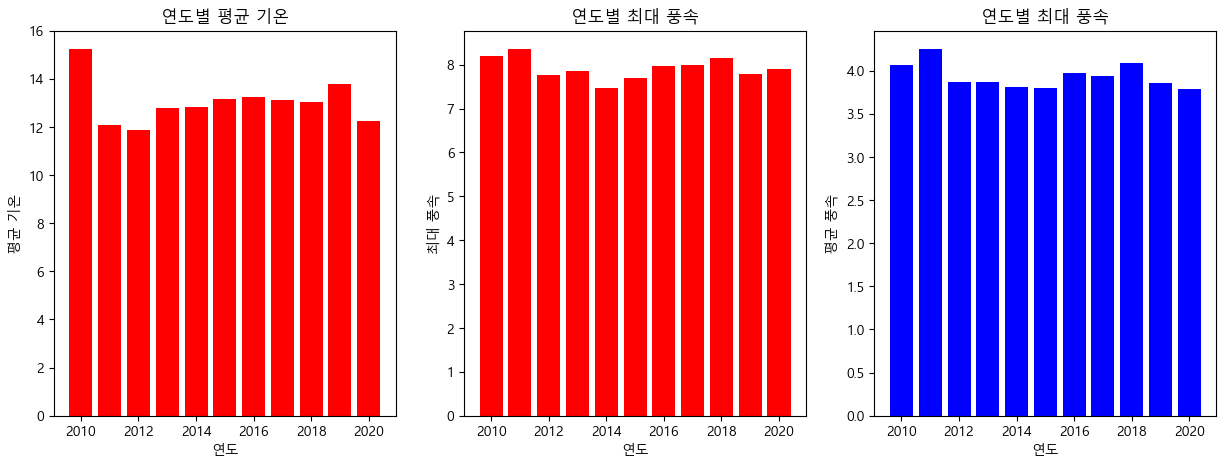

In [19]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [20]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [21]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
3,6.250323,8.871935,4.388839
4,11.064667,9.287133,4.617933
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

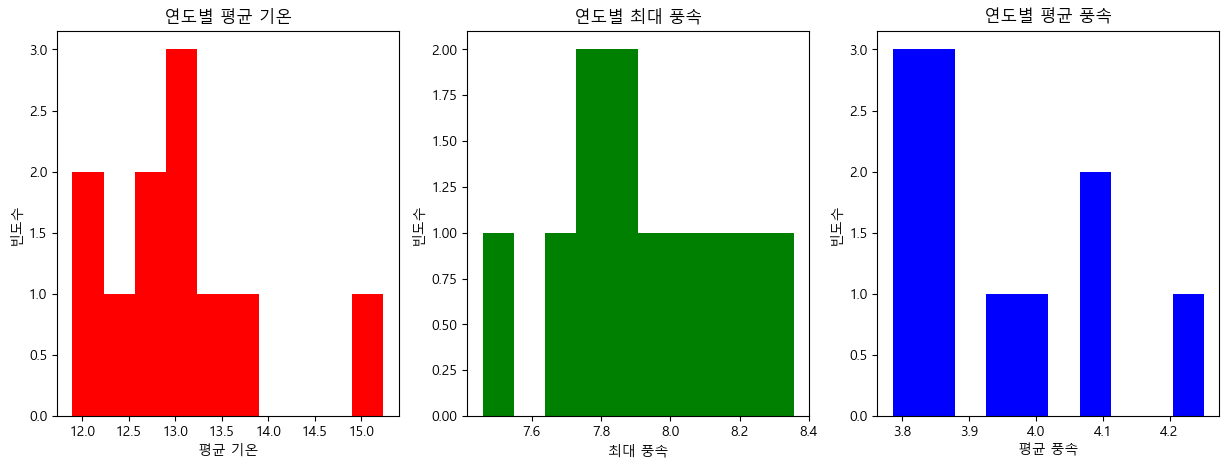

In [22]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스트그램으로 출력하시오.

# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


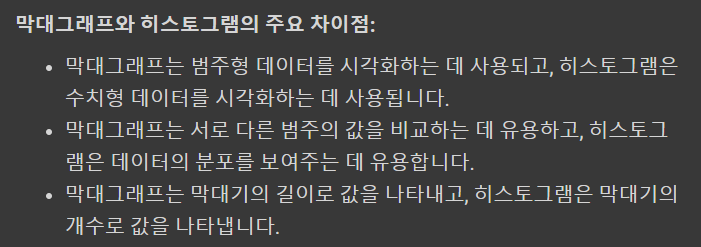

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-23까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [23]:
import pandas as pd

file_path='weather.csv'
df=pd.read_csv(file_path)

print("앞 3개 행 출력: ")
print(df.head(3))

print("마지막 3개 행 출력: ")
print(df.tail(3))

앞 3개 행 출력: 
           일시  평균 기온  최대 풍속  평균 풍속
0  2010-08-01   28.7    8.3    3.4
1  2010-08-02   25.2    8.7    3.8
2  2010-08-03   22.1    6.3    2.9
마지막 3개 행 출력: 
              일시  평균 기온  최대 풍속  평균 풍속
3650  2020-07-29   21.6    3.2    1.0
3651  2020-07-30   22.9    9.7    2.4
3652  2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [24]:
import pandas as pd

file_path='weather.csv'

df=pd.read_csv(file_path)
df['일시']= pd.to_datetime(df['일시'])

target_date= '2015-06-06'
filtered_df= df[df['일시']== target_date]

if not filtered_df.empty:
    average_temp= filtered_df.iloc[0]['평균 기온']
    wind_speed= filtered_df.iloc[0]['최대 풍속']
    average_wind= filtered_df.iloc[0]['평균 풍속']
    print(f"{target_date}의 평균 기온: {average_temp}")
    print(f"{target_date}의 최대 풍속: {max_wind}")
    print(f"{target_date}의 평균 풍속: {average_wind}")
else:
    print(f"{target_date}의 데이터가 존재하지 않습니다.")

2015-06-06의 평균 기온: 16.6
2015-06-06의 최대 풍속: 3.94
2015-06-06의 평균 풍속: 1.9


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [25]:
import pandas as pd

file_path= 'weather.csv'
df= pd.read_csv(file_path)

max_avg_temp= df['평균 기온'].idxmax()
hottest_date= df.loc[max_avg_temp, '일시']

hottest_weather_data=df[df['일시']== hottest_date]

if not hottest_weather_data.empty:
    average_temp = hottest_weather_data.iloc[0]['평균 기온']
    max_wind_speed = hottest_weather_data.iloc[0]['최대 풍속']
    avg_wind_speed = hottest_weather_data.iloc[0]['평균 풍속']
    
    print(f"평균 기온이 가장 높았던 날짜: {hottest_date}")
    print(f"평균 기온: {average_temp}")
    print(f"최대 풍속: {max_wind_speed}")
    print(f"평균 풍속: {avg_wind_speed}")
else:
    print("데이터를 찾을 수 없습니다.")

평균 기온이 가장 높았던 날짜: 2013-08-08
평균 기온: 31.3
최대 풍속: 7.8
평균 풍속: 4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [26]:
import pandas as pd

file_path= 'weather.csv'
df= pd.read_csv(file_path)

hot_days = df[df['평균 기온'] > 30]

if not hot_days.empty:
    print("평균 기온이 30도를 넘는 날짜들의 기상 데이터:")
    for index, row in hot_days.iterrows():
        date = row['일시']
        average_temp = row['평균 기온']
        max_wind = row['최대 풍속']
        avg_wind = row['평균 풍속']
        print(f"날짜: {date}, 평균 기온: {average_temp}, 최대 풍속: {max_wind}, 평균 풍속: {avg_wind}m/s")
else:
    print("평균 기온이 30도를 넘는 날짜가 없습니다.")


평균 기온이 30도를 넘는 날짜들의 기상 데이터:
날짜: 2013-08-08, 평균 기온: 31.3, 최대 풍속: 7.8, 평균 풍속: 4.6m/s
날짜: 2013-08-09, 평균 기온: 30.6, 최대 풍속: 9.9, 평균 풍속: 6.4m/s
날짜: 2013-08-10, 평균 기온: 30.6, 최대 풍속: 7.4, 평균 풍속: 3.8m/s
날짜: 2018-07-23, 평균 기온: 30.5, 최대 풍속: 6.5, 평균 풍속: 1.6m/s
날짜: 2018-08-04, 평균 기온: 30.3, 최대 풍속: 5.8, 평균 풍속: 3.0m/s


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

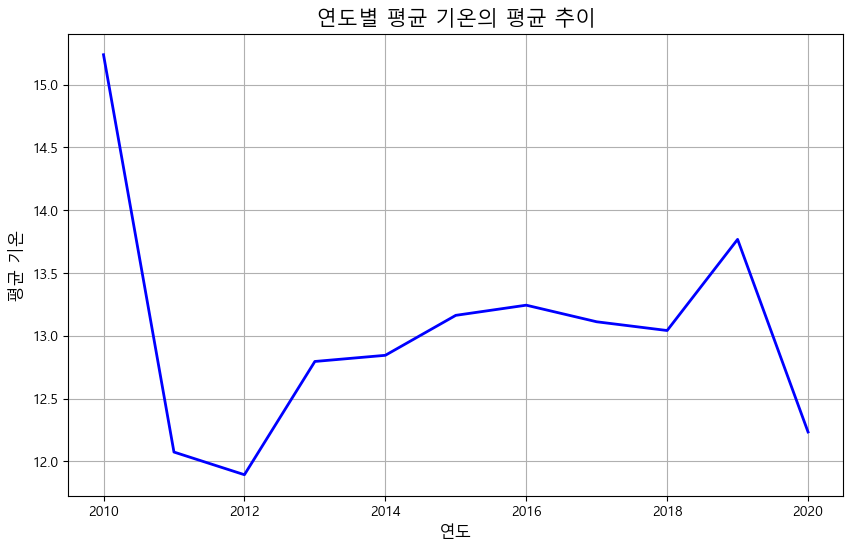

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로에 맞게 수정하여야 합니다.
file_path = 'weather.csv'

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv(file_path)

# 'date' 열을 datetime 자료형으로 변환하여 연도 정보를 추출
df['일시'] = pd.to_datetime(df['일시'])
df['year'] = df['일시'].dt.year

# 연도별 평균 기온의 평균 계산
year_avg_temp = df.groupby('year')['평균 기온'].mean()

# 선 그래프로 연도별 평균 기온의 평균 추이 그리기
plt.figure(figsize=(10, 6))
year_avg_temp.plot(kind='line', color='b', linestyle='-', linewidth=2, markersize=8)

# 그래프 제목과 축 라벨 설정
plt.title('연도별 평균 기온의 평균 추이', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('평균 기온', fontsize=12)

# 그리드 추가
plt.grid(True)

# 그래프 출력
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

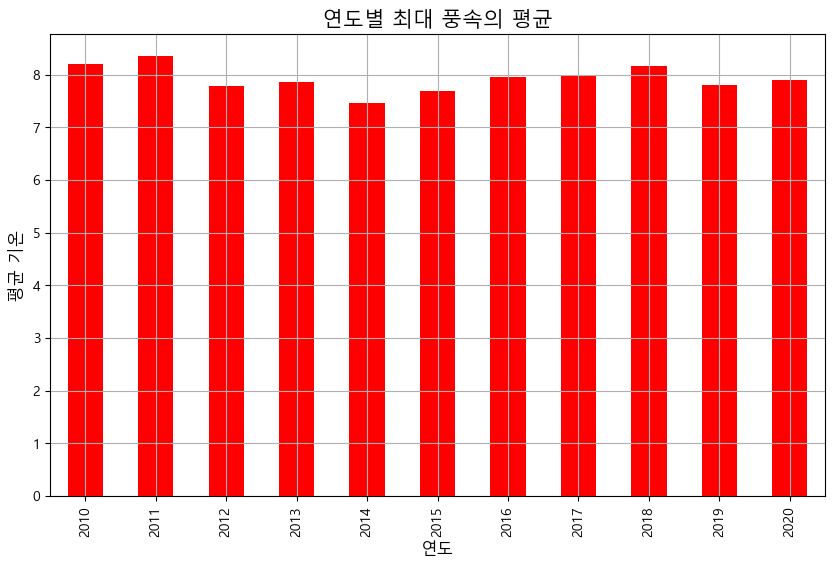

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

file_path= 'weather.csv'
df= pd.read_csv(file_path)

df['일시']= pd.to_datetime(df['일시'])
df['year']= df['일시'].dt.year

year_avg_maxwind= df.groupby('year')['최대 풍속'].mean()

plt.figure(figsize=(10, 6))
year_avg_maxwind.plot(kind='bar', color='red')

plt.title('연도별 최대 풍속의 평균', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('평균 기온', fontsize=12)

plt.grid(True)

plt.show()
                        

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


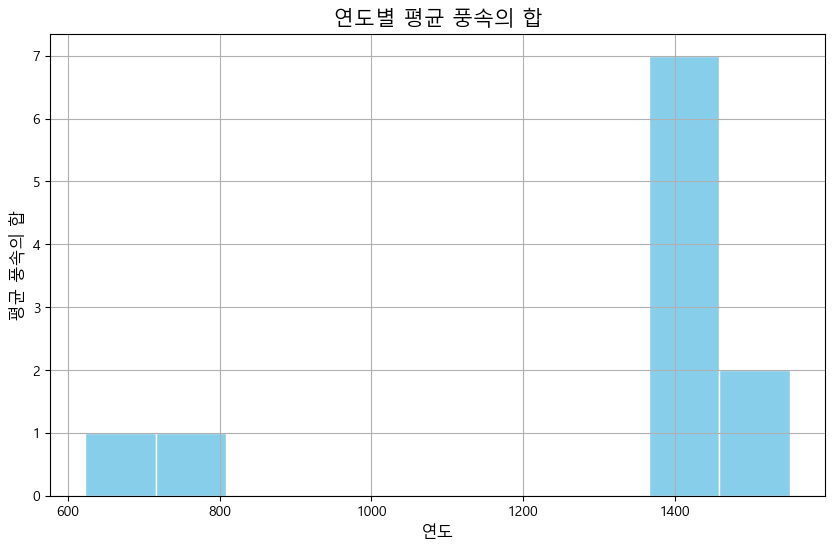

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'weather.csv'
df = pd.read_csv(file_path)

df['일시'] = pd.to_datetime(df['일시'])
df['year'] = df['일시'].dt.year

yearly_sum_avg_wind = df.groupby('year')['평균 풍속'].sum()

plt.figure(figsize=(10, 6))
plt.hist(yearly_sum_avg_wind, bins=10, color='skyblue', edgecolor='white')

plt.title('연도별 평균 풍속의 합', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('평균 풍속의 합', fontsize=12)


plt.grid(True)
plt.show()

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [30]:
import pandas as pd

file_path= 'weather.csv'
df= pd.read_csv(file_path)

df['일시']= pd.to_datetime(df['일시'])
df['year']=df['일시'].dt.year

mean_temp_2015 = df[df['year'] == 2015]['평균 기온'].mean()
mean_temp_2016 = df[df['year'] == 2016]['평균 기온'].mean()

if mean_temp_2015 > mean_temp_2016:
    print("2015년이 2016년보다 더 더웠다.")
elif mean_temp_2015 < mean_temp_2016:
    print("2016년이 2015년보다 더 더웠다.")
else:
    print("2015년과 2016년의 평균 기온이 같다.")

2016년이 2015년보다 더 더웠다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [31]:
import pandas as pd

file_path = 'weather.csv'
df = pd.read_csv(file_path)

df['일시'] = pd.to_datetime(df['일시'])
df['month'] = df['일시'].dt.month

monthly_sum_mean_temp = df.groupby('month')['평균 기온'].sum()

min_month = monthly_sum_mean_temp.idxmin()
max_month = monthly_sum_mean_temp.idxmax()

print(f"평균 기온의 합이 가장 적은 달: {min_month}월")
print(f"평균 기온의 합이 가장 많은 달: {max_month}월")


평균 기온의 합이 가장 적은 달: 1월
평균 기온의 합이 가장 많은 달: 8월


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [106]:
import pandas as pd
file_path = 'weather.csv'

df = pd.read_csv(file_path)

df['일시'] = pd.to_datetime(df['일시'])
df['year'] = df['일시'].dt.year

yearly_avg_max_wind = df.groupby('year')['최대 풍속'].mean()

max_avg_wind_year = yearly_avg_max_wind.idxmax()
print(f"연도별 최대 풍속의 평균이 가장 큰 연도: {max_avg_wind_year}년")

연도별 최대 풍속의 평균이 가장 큰 연도: 2011년
